In [22]:
import pandas as pd

In [63]:
import numpy as np

In [23]:
jan19df = pd.read_csv('jan19.csv', index_col='Unnamed: 0')

In [24]:
jan19df.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

# <span style="color:red">convert string to datetime objects</span>



In [95]:
jan19df.pub_date.unique()

array(['2019-01-01T00:00:03+0000', '2019-01-01T00:00:07+0000',
       '2019-01-01T00:15:31+0000', ..., '2019-01-31T23:41:47+0000',
       '2019-01-31T23:47:23+0000', '2019-01-31T23:57:57+0000'],
      dtype=object)

In [96]:
type(jan19df.pub_date[0])

str

In [97]:
(jan19df.word_count.unique()).shape

(1545,)

In [98]:
jan19df.print_section.unique().shape

(16,)

In [99]:
jan19df.print_section.unique()

array([nan, 'A', 'SR', 'B', 'C', 'D', 'BR', 'TR', 'BU', 'RE', 'ST', 'AR',
       'MM', 'SP', 'MB', 'F'], dtype=object)

# <span style="color:red">which page is an article on? can i predict which page a story is from?</span>

In [100]:
jan19df.print_page.unique().shape

(42,)

In [101]:
pages_used = np.sort(jan19df.print_page.unique())

In [102]:
pages_used

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 30., 31., 32., 34., 35., 38., 42., 43., 44., 46., 54.,
       58., 66., nan])

# <span style="color:red">should I include all these subsections?</span>

In [103]:
jan19df.subsection_name.unique()

array([nan, 'Sunday Review', 'Opinion | Business & Economics',
       'Personal Tech', 'Opinion | The World', 'Columnists',
       'Middle East', 'Europe', 'Asia Pacific', 'Self-Care', 'Politics',
       'Move', 'Book Review', 'Media', 'Americas', 'Weddings',
       'Television', 'Commercial Real Estate', 'Dance', 'DealBook',
       'The Daily', 'College Football', 'Eat', 'Art & Design', 'Live',
       'Australia', 'Mind', 'Music', 'Golf', 'Family', 'Economy',
       'Baseball', 'Africa', 'Energy & Environment ', 'Pro Basketball',
       'Lesson Plans', 'Wine, Beer & Cocktails', 'Soccer', 'Canada',
       'Tennis', 'Wirecutter', 'Hockey', 'Pro Football', 'Mutual Funds',
       'Olympics', 'Learning'], dtype=object)

In [104]:
news = jan19df[jan19df['type_of_material'] == 'News']

In [105]:
oped = jan19df[jan19df['type_of_material'] == 'Op-Ed']

In [141]:
jan19df.word_count

0       2248
1        985
2        845
3        879
4       1116
        ... 
3469     332
3470    1661
3471     976
3472     745
3473     695
Name: word_count, Length: 3474, dtype: int64

In [122]:
news.subsection_name.unique().shape[0]           

42

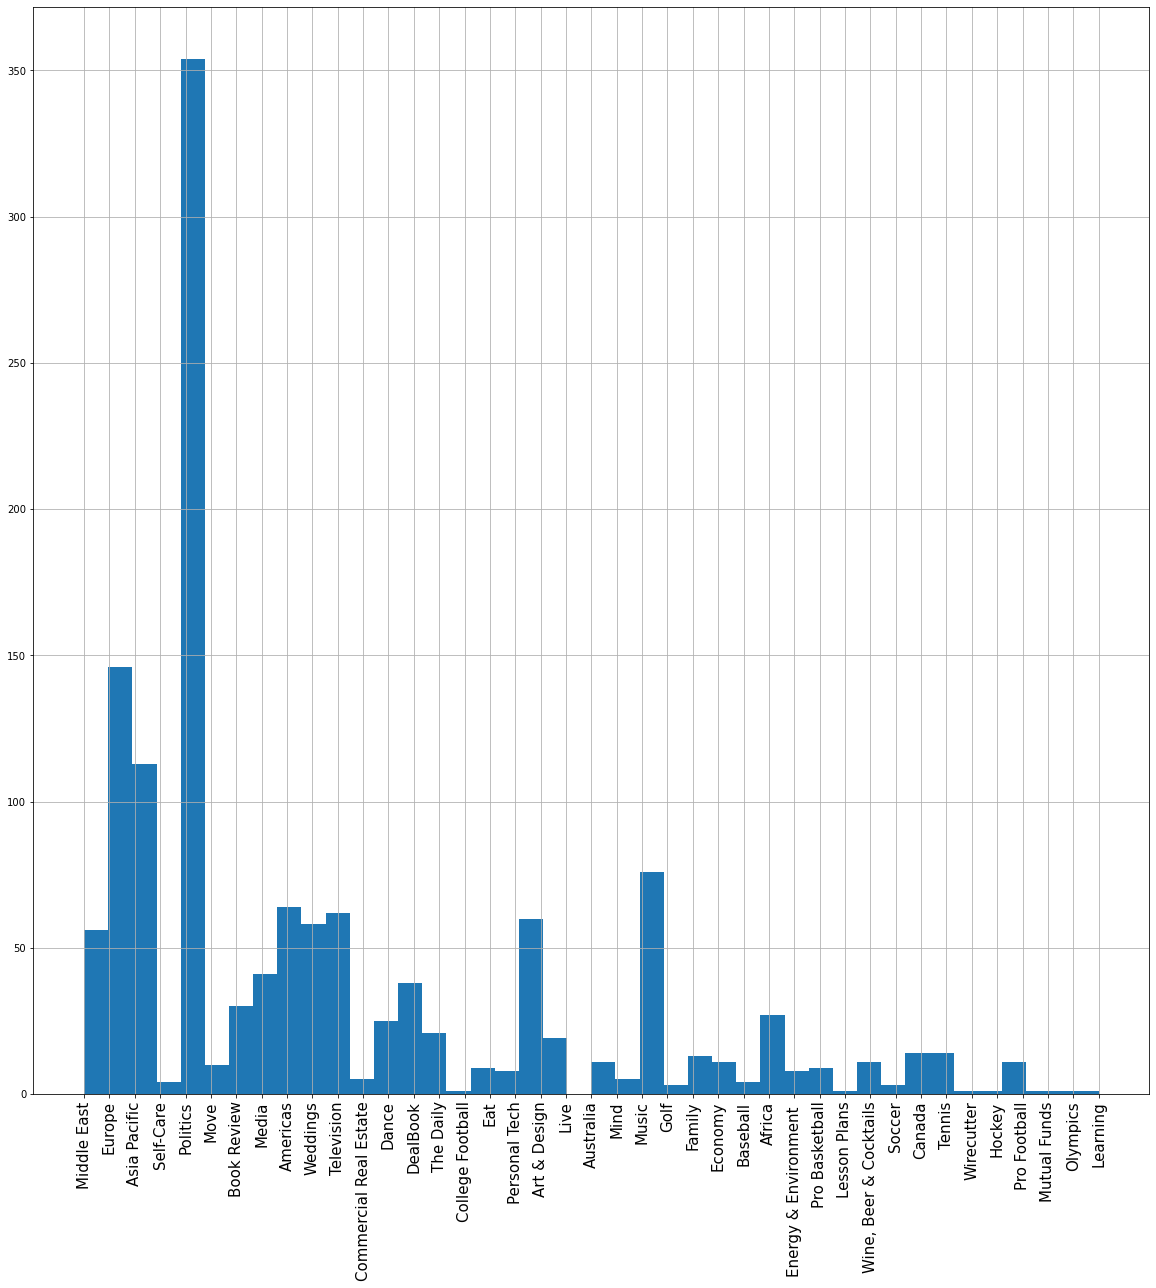

In [128]:
news.subsection_name.hist(xrot=90, xlabelsize=15, figsize=(20,20), bins=(news.subsection_name.unique().shape[0]));

In [107]:
oped.subsection_name.unique()

array([nan, 'Sunday Review', 'Opinion | Business & Economics',
       'Personal Tech', 'Opinion | The World', 'Columnists'], dtype=object)

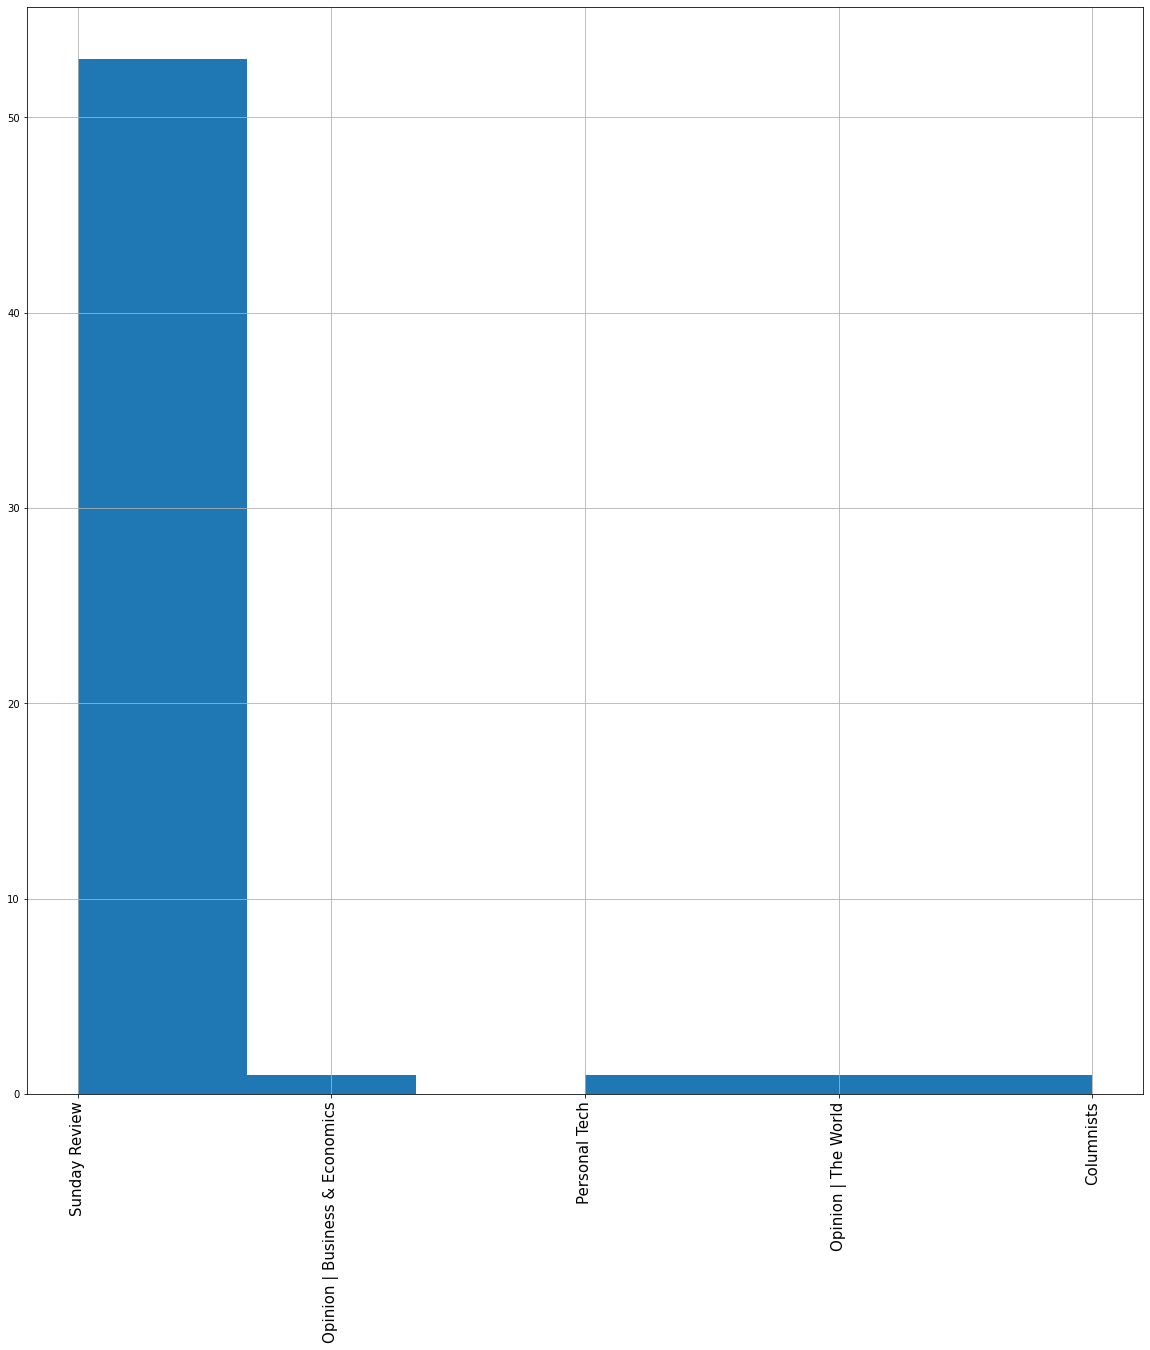

In [129]:
oped.subsection_name.hist(xrot=90, xlabelsize=15, figsize=(20,20), bins=(oped.subsection_name.unique().shape[0]));

In [134]:
jan19df.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

# remove first and last words from text

In [148]:
# remove advertisement head and tail
def split_trim(string):
    text = string.split(" ")
    text = text[3:-14]
    return text
    
    

In [145]:
jan19df.word_count[0]

2248

In [174]:
sample = jan19df.text[0]

In [175]:
sample = sample.split(" ")

In [178]:
sample[-14:]

["'Follow",
 'The',
 'New',
 'York',
 'Times',
 'Opinion',
 'section',
 'on',
 'Facebook,',
 'Twitter',
 '(@NYTopinion)',
 'and',
 "Instagram.',",
 "'Advertisement']"]

In [137]:
type_text = jan19df[['type_of_material', 'text']]

In [138]:
type_text.to_csv('type_text.csv')